In [71]:
from pydataset import data
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [72]:
%matplotlib inline
#RM - average number of rooms per dwelling
#LSTAT - % lower status of the population
#PTRATIO - pupil-teacher ratio by town
#MEDV - Median value of owner-occupied homes in $1000’s


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB
None


array([[<AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'LSTAT'}>],
       [<AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'MEDV'}>]], dtype=object)

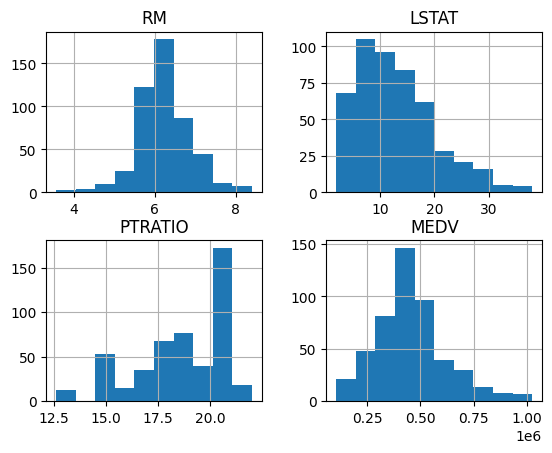

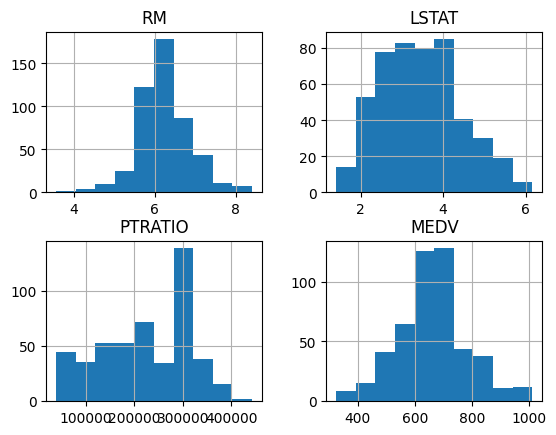

In [93]:
#housingData = data('BostonHouses')
housingData = pd.read_csv('BostonHouses.csv')
#print(housingData)

housingData.hist()
print(housingData.info())
# housingData['LSTAT'] = np.log(housingData['LSTAT']+1)
from scipy.stats import yeojohnson

#housingData['PTRATIO'], lambda_value = boxcox(housingData['PTRATIO'])
housingData['MEDV'] = np.sqrt(housingData['MEDV'])
housingData['LSTAT'] = np.sqrt(housingData['LSTAT'])
#housingData['RM'] = np.sqrt(housingData['RM'])

housingData['PTRATIO'], lambda_value = yeojohnson(housingData['PTRATIO'])

# housingData['PTRATIO'] = 1 / (housingData['PTRATIO'] ** 2)
# housingData['RM'] = (housingData['RM'] ** 3)
# housingData['PTRATIO'] = 1 / housingData['PTRATIO']


housingData.hist()

<AxesSubplot: >

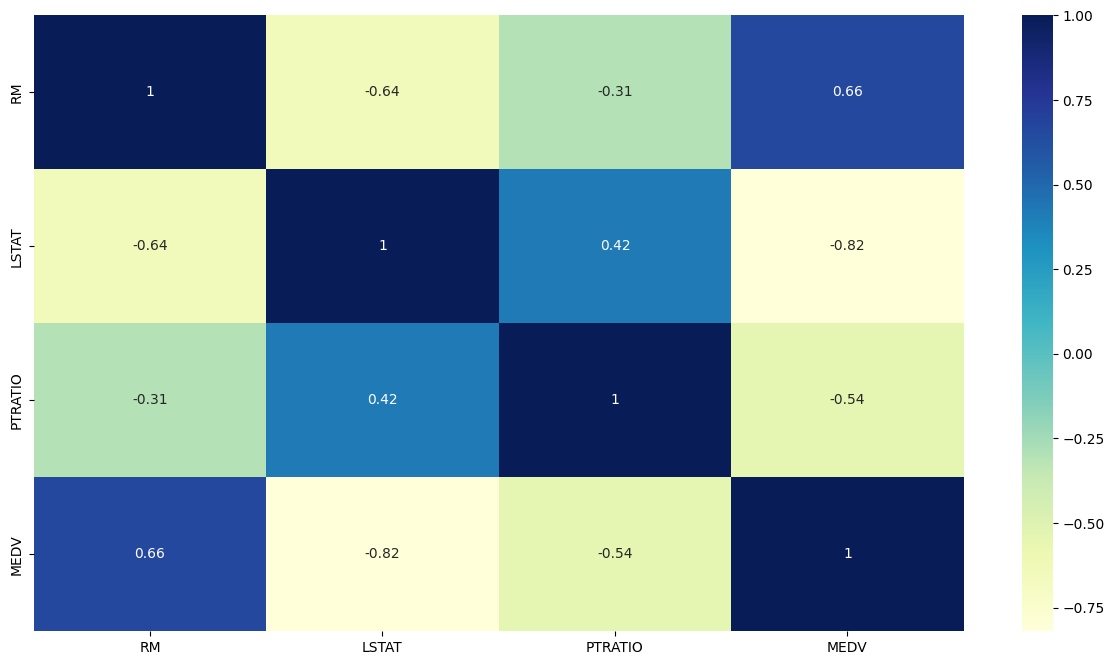

In [91]:
plt.figure(figsize=(15,8))
sns.heatmap(housingData.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot: xlabel='LSTAT', ylabel='RM'>

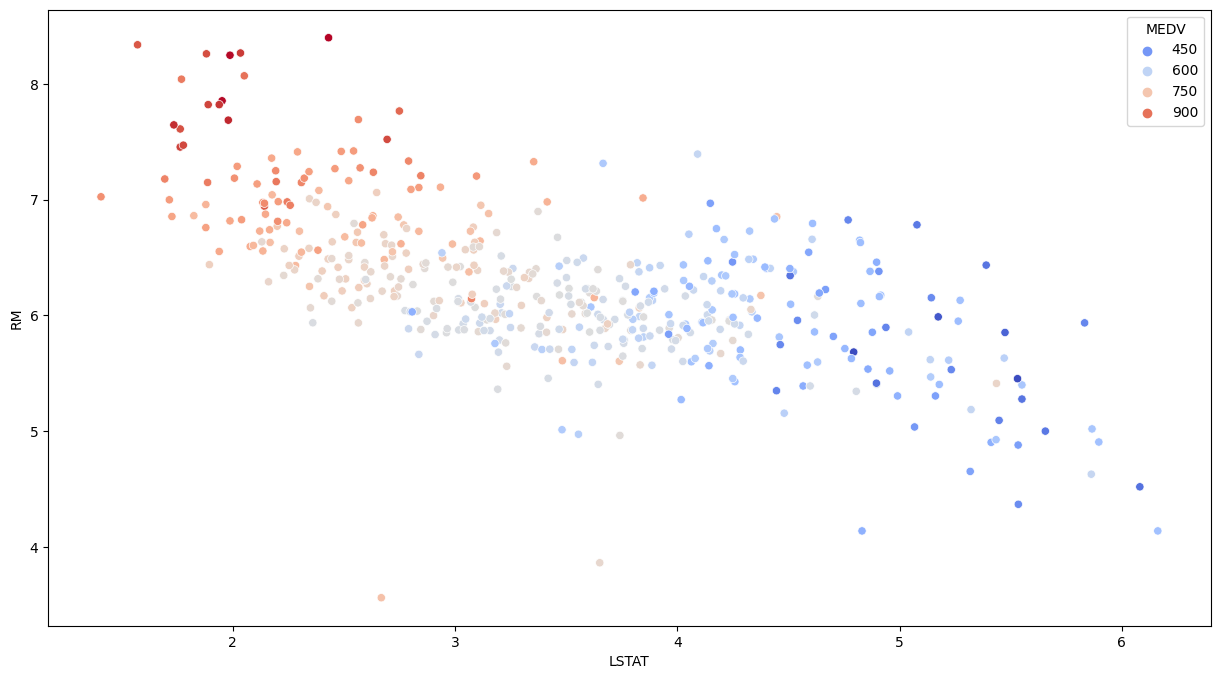

In [97]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='LSTAT', y='RM', data=housingData,hue='MEDV', palette="coolwarm" )

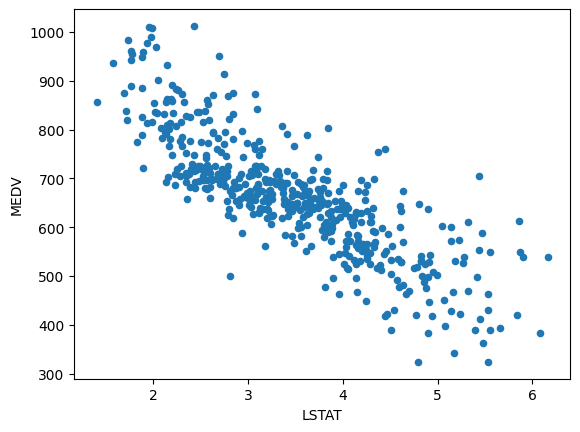

In [99]:
housingData.plot(kind='scatter', x='LSTAT', y='MEDV')
plt.show()

In [100]:
#Test train split

x_train, x_test, y_train, y_test = train_test_split(housingData.LSTAT, housingData.MEDV)

In [ ]:
plt.scatter(x_train, y_train, label= "Training Data", color="r", alpha='0.7' )
plt.scatter(x_test, y_test, label= "Training Data", color="g", alpha='0.7' )